In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from io import StringIO
%config InlineBackend.figure_format = 'retina' 

HW 1

Problem 1:

In [2]:
a = 1
b = a
a *= 2
print(a)
print(b)

2
1


The operator of *= is equivalent to setting the value of the left to itself times whatever you put on right. Here, it is new_a = old_a * 2

In [3]:
# Addition: Adding 1 to a
a += 1
# Subtraction: Subtracting 1 from a
a -= 1
# Division: Dividing a by 2
a /= 2
# A boolean operator (True or False) checking whether the values of a and b are equal
a == b

True

Problem 2:

In [4]:
a = np.array([1, 2, 3, 3, 5, 5])
b = a
a *= 2
#a = np.multiply(a, 2)
print(a)
print(b)

[ 2  4  6  6 10 10]
[ 2  4  6  6 10 10]


The behavior differs from Problem 1 because updating a affects both a and b in the array case. This comes down to immutability vs. mutability in Python. In both examples, b initially references the same object as a. However, with integers (immutable), the *= operation creates a new integer object and rebinds a to it, leaving b unchanged. With arrays (mutable), *= modifies the existing object in place, so both a and b reflect the update because of the same reference.

In [5]:
a = np.array([1, 2, 3, 3, 5, 5])
b = a
a = np.multiply(a, 2)
print(a)
print(b)

[ 2  4  6  6 10 10]
[1 2 3 3 5 5]


Problem 3:

In [6]:
a = np.array([6, 8])
np.linalg.norm(a)

10.0

In [7]:
b = np.array([8, 3])
np.linalg.norm(a - b)

5.385164807134504

Problem 4:

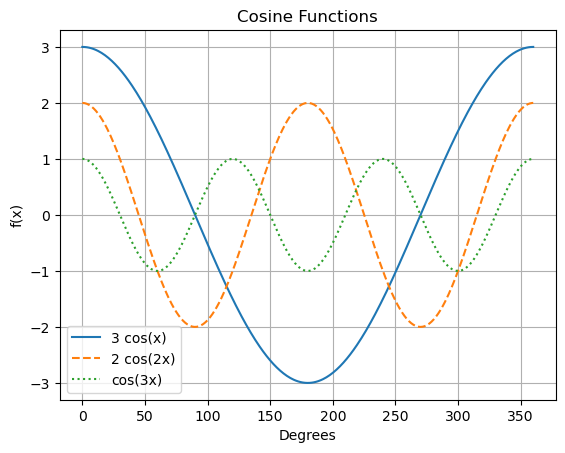

In [8]:
x = np.linspace(0, 360, 400)

f1 = 3 * np.cos(np.deg2rad(x))
f2 = 2 * np.cos(np.deg2rad(2*x))
f3 = np.cos(np.deg2rad(3*x))

plt.plot(x, f1, '-', label="3 cos(x)")
plt.plot(x, f2, '--', label="2 cos(2x)")
plt.plot(x, f3, ':', label="cos(3x)")

plt.xlabel("Degrees")
plt.ylabel("f(x)")
plt.title("Cosine Functions")

plt.legend()
plt.grid(True)
plt.show()

Problem 5:

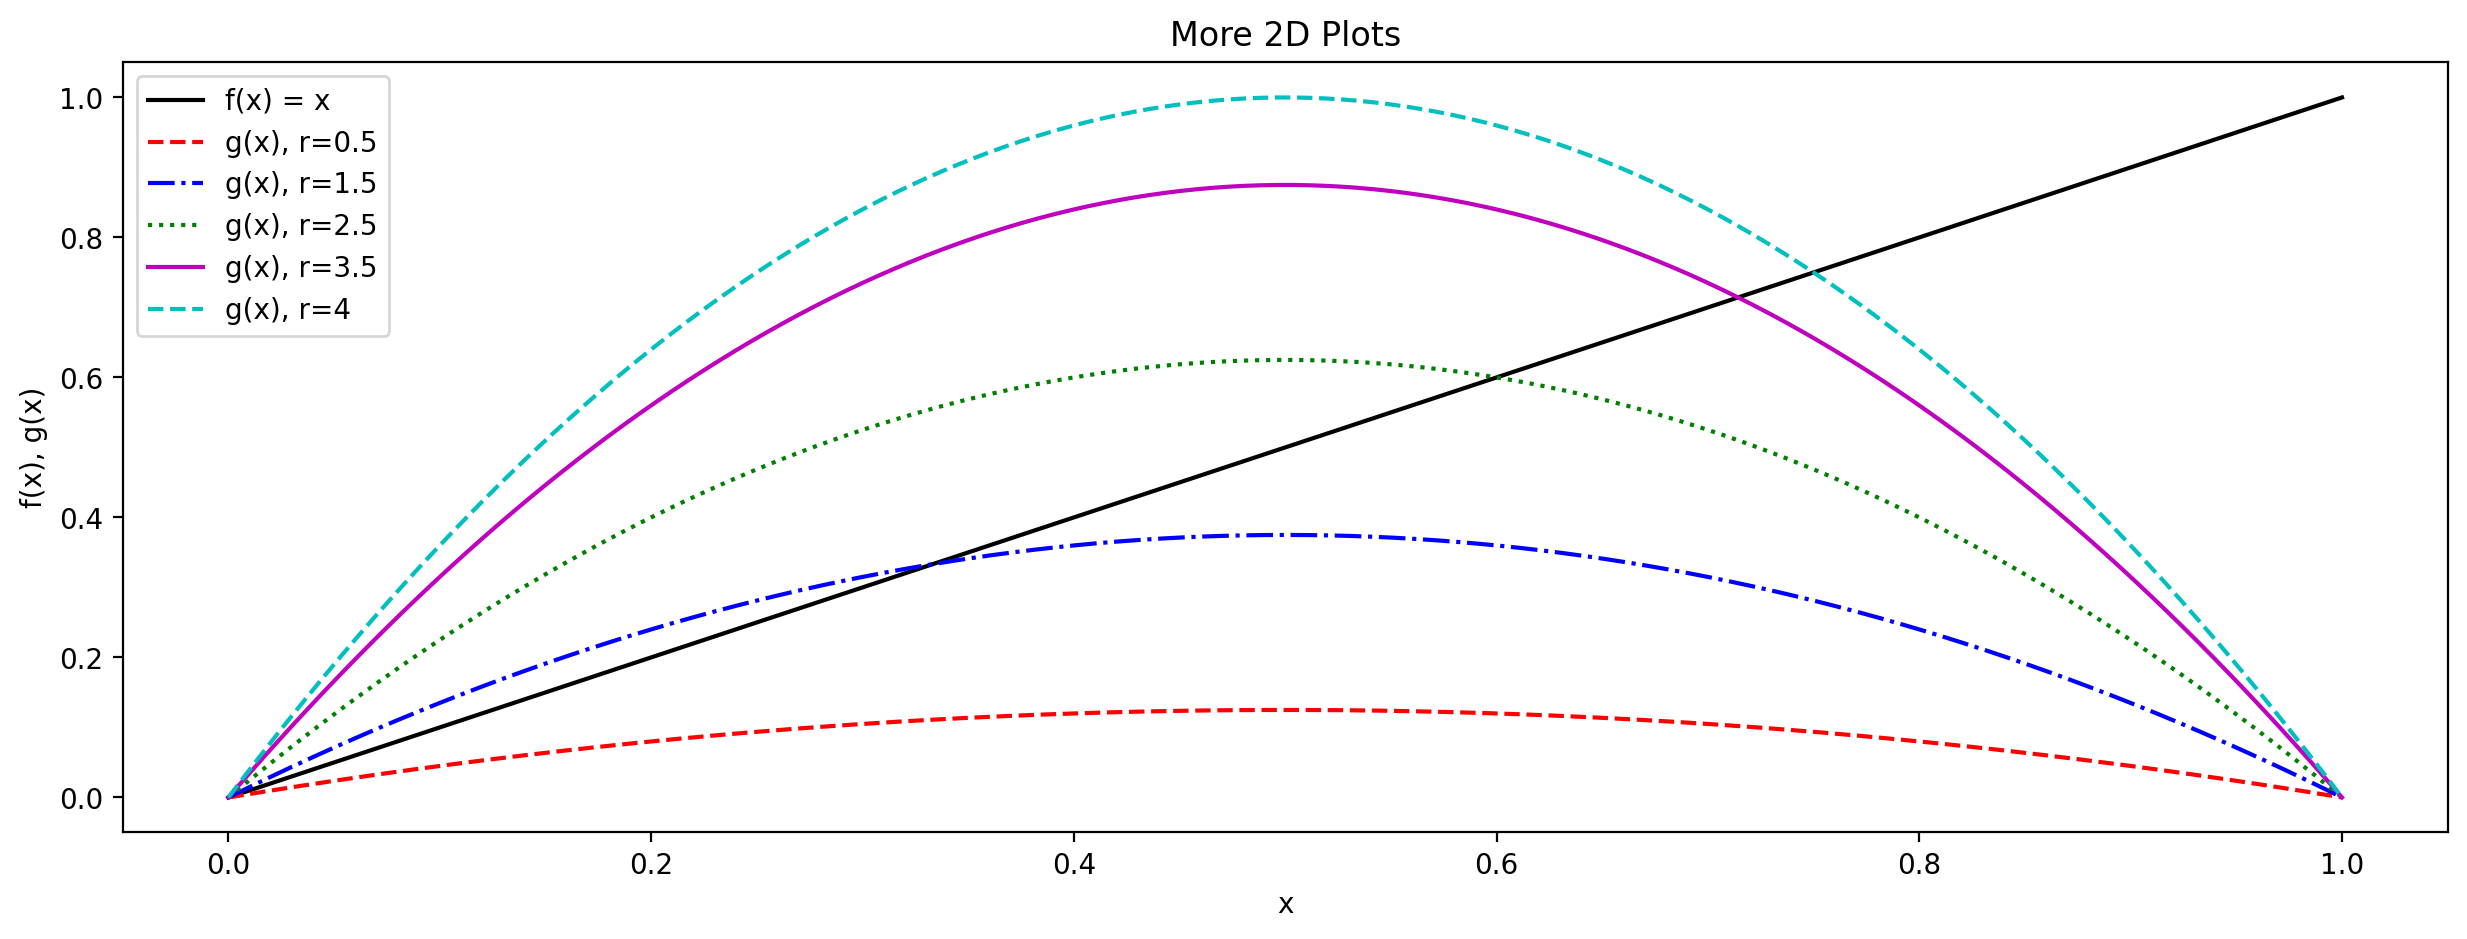

In [19]:
x = np.linspace(0, 1, 400)
f = x

g1 = 0.5 * x * (1 - x)
g2 = 1.5 * x * (1 - x)
g3 = 2.5 * x * (1 - x)
g4 = 3.5 * x * (1 - x)
g5 = 4.0 * x * (1 - x)

plt.plot(x, f, 'k-', label="f(x) = x")
plt.plot(x, g1, 'r--', label="g(x), r=0.5")
plt.plot(x, g2, 'b-.', label="g(x), r=1.5")
plt.plot(x, g3, 'g:', label="g(x), r=2.5")
plt.plot(x, g4, 'm-', label="g(x), r=3.5")
plt.plot(x, g5, 'c--', label="g(x), r=4")

plt.xlabel("x")
plt.ylabel("f(x), g(x)")
plt.title("More 2D Plots")

plt.legend()
plt.show()

In [17]:
r_values = [0.5, 1.5, 2.5, 3.5, 4]

print("All r values have intersections at (0,0)")

for r in r_values:
    if r >= 1:
        x2 = 1 - 1/r
        y2 = x2
        print(f"r={r}: intersection at ({x2:.3f}, {y2:.3f})")

All r values have intersections at (0,0)
r=1.5: intersection at (0.333, 0.333)
r=2.5: intersection at (0.600, 0.600)
r=3.5: intersection at (0.714, 0.714)
r=4: intersection at (0.750, 0.750)


Problem 6:

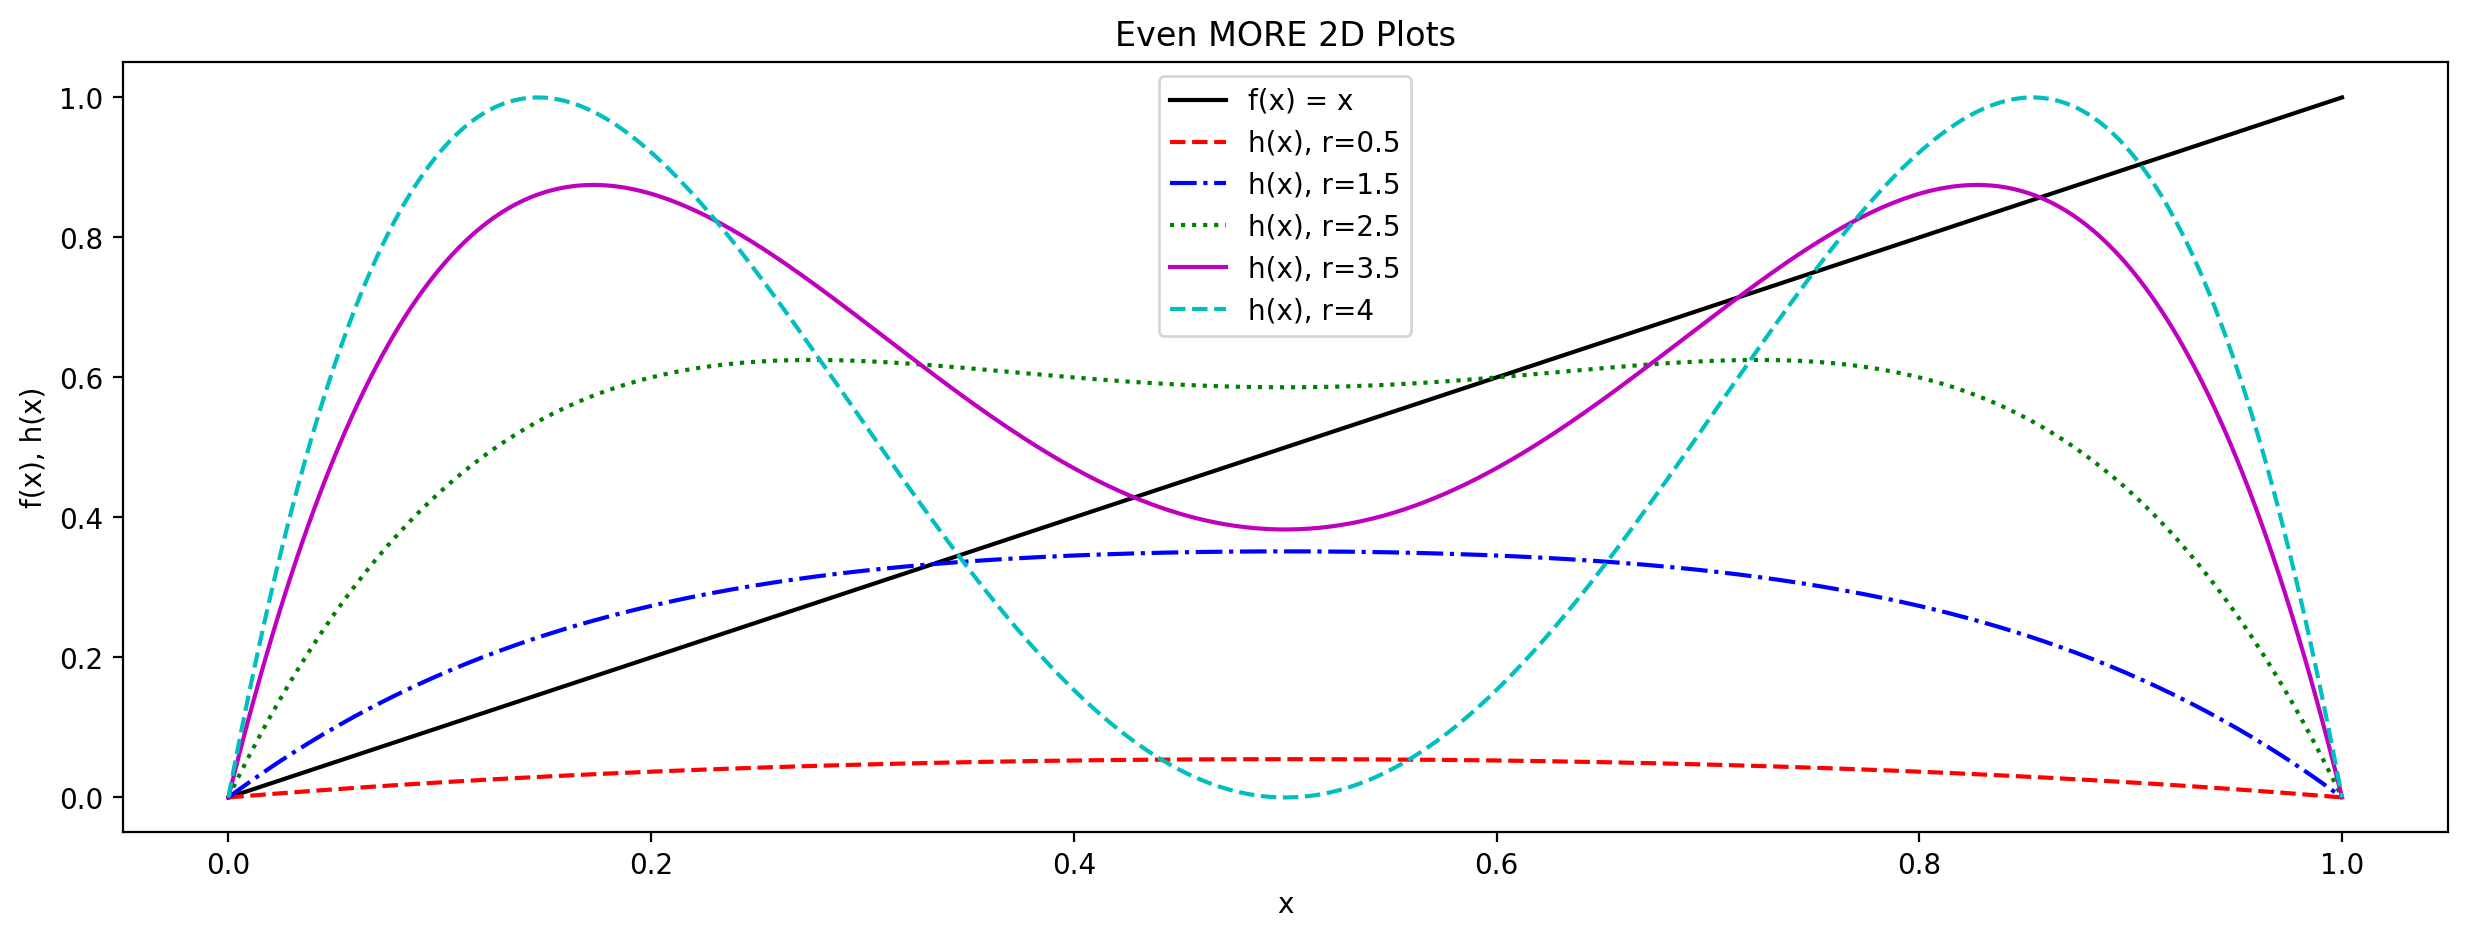

In [20]:
x = np.linspace(0, 1, 400)
f = x

def g(x, r):
    return r * x * (1 - x)

def h(x, r):
    gx = g(x, r)
    return g(gx, r)


h1 = h(x, 0.5)
h2 = h(x, 1.5)
h3 = h(x, 2.5)
h4 = h(x, 3.5)
h5 = h(x, 4.0)

# plot
plt.plot(x, f, 'k-', label="f(x) = x")
plt.plot(x, h1, 'r--', label="h(x), r=0.5")
plt.plot(x, h2, 'b-.', label="h(x), r=1.5")
plt.plot(x, h3, 'g:', label="h(x), r=2.5")
plt.plot(x, h4, 'm-', label="h(x), r=3.5")
plt.plot(x, h5, 'c--', label="h(x), r=4")

plt.xlabel("x")
plt.ylabel("f(x), h(x)")
plt.title("Even MORE 2D Plots")

plt.legend()
plt.show()


Problem 7:

In [21]:
file_path = '/Users/simoncha/Desktop/school/EPS 109/hw/hw1/ice_core_CO2_data.txt'

with open(file_path, 'r', encoding='utf-8') as file:
    content = file.read()

df = pd.read_csv(file_path, sep=r"\s+", header=None, comment="#")
df.columns = ["Gas_Age_yr", "CO2_ppmv"]

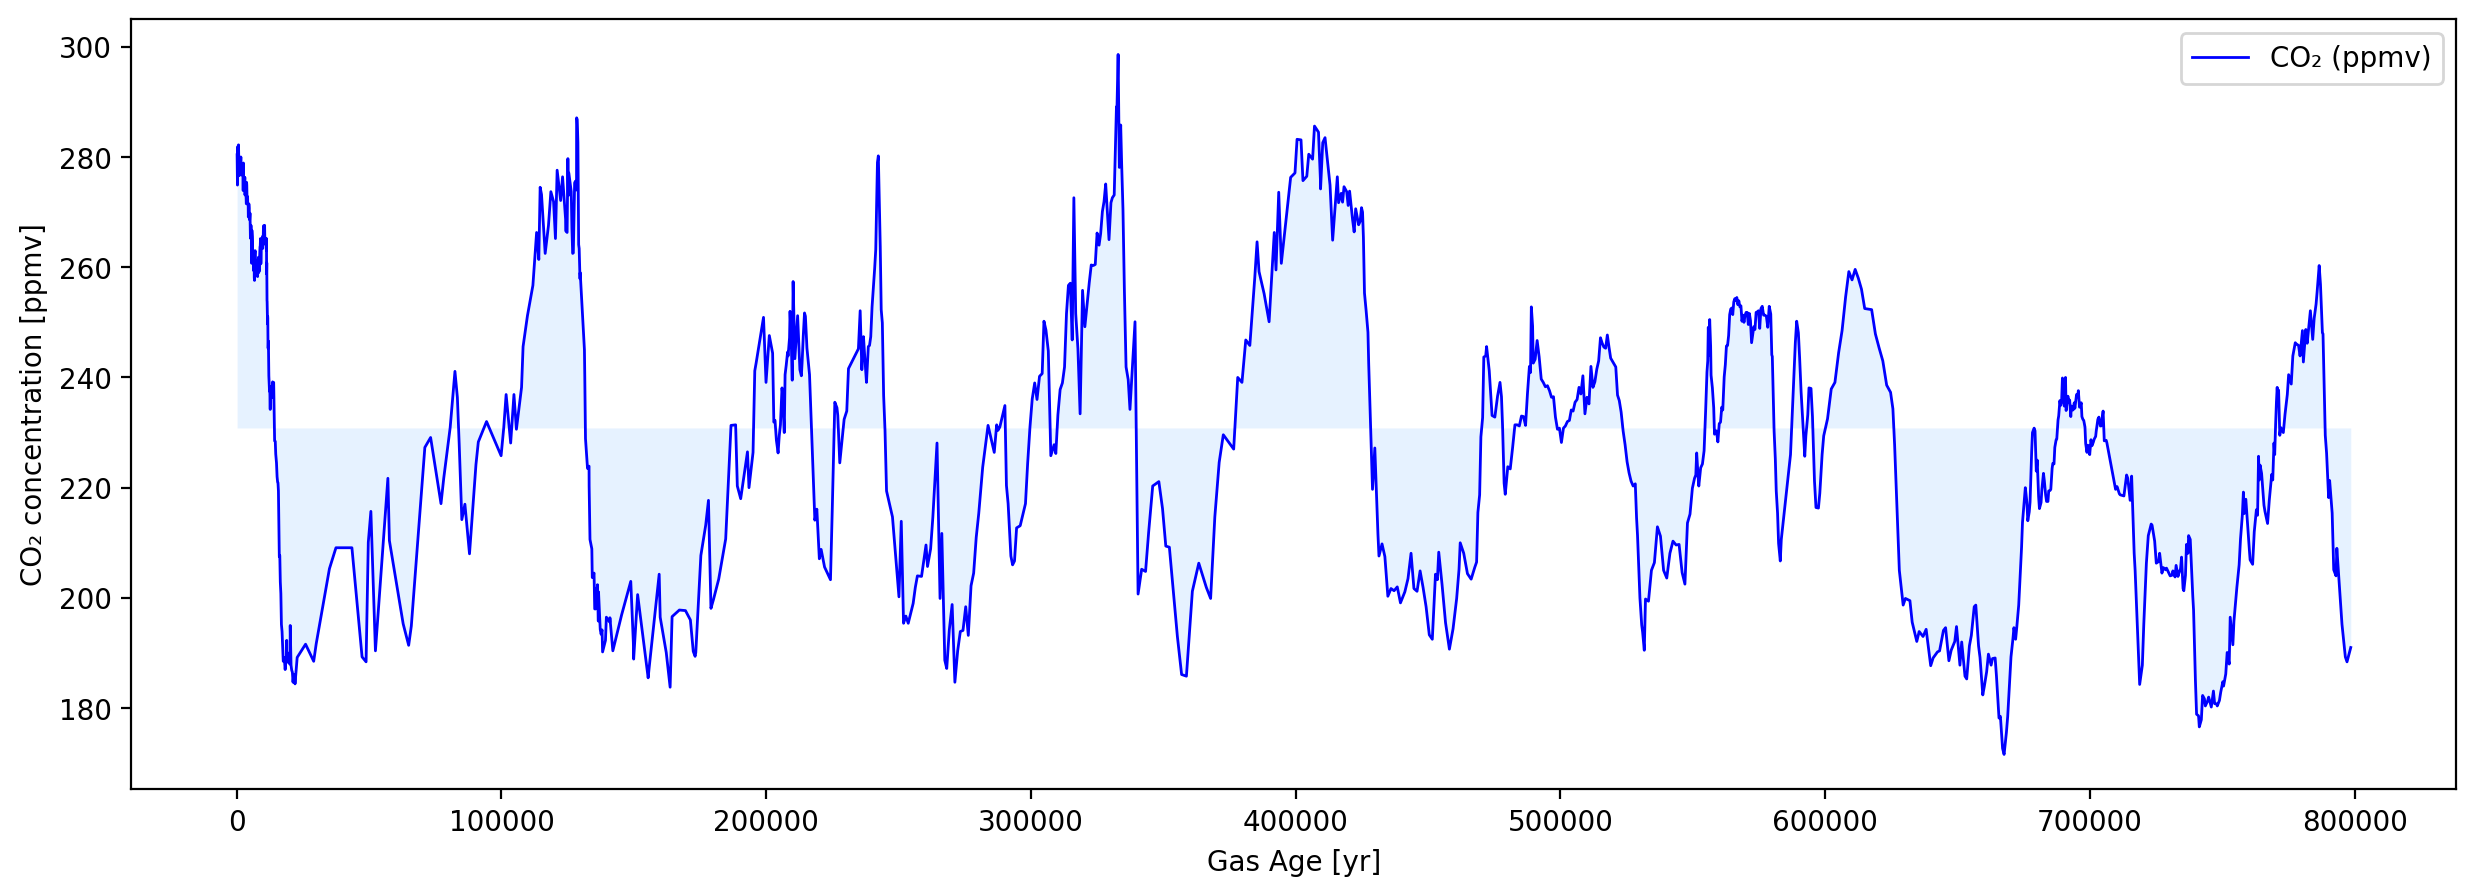

In [22]:
file_path = '/Users/simoncha/Desktop/school/EPS 109/hw/hw1/ice_core_CO2_data.txt'
df = pd.read_csv(file_path, sep=r"\s+", header=None, comment="#")
df.columns = ["Gas_Age_yr", "CO2_ppmv"]

co2 = df["CO2_ppmv"].values
average = sum(co2) / co2.shape[0]

plt.rcParams['figure.figsize'] = [15, 5]
plt.plot(df["Gas_Age_yr"], df["CO2_ppmv"], 'b-', linewidth=1,
         markersize=0, mec='r', mew=2, mfc='pink', label="CO₂ (ppmv)")

plt.fill_between(df["Gas_Age_yr"], df["CO2_ppmv"],
                 average, color=(0.90, 0.95, 1.0), lw=0)

plt.xlabel('Gas Age [yr]')
plt.ylabel('CO₂ concentration [ppmv]')
plt.legend()
plt.show()

Problem 8:

In [ ]:
for i in range(1,20):
    print(i)

Here, we have values 1 through 19. The first parameter (1) is the start number and the second parameter (20) is the count until you end exclusive. The default step size is 1.

In [ ]:
for i in range(1,20,5):
    print(i)

Same thing as above, but now the step size is 5.

In [ ]:
for i in range(1,-20,-1):
    print(i)

Because the first parameter is positive and second parameter is negative, the direction is "backwards" we and don't dip under -20 inclusive. The negative step size correctly follows because +(-1) = -1.

In [19]:
for i in range(1,20,2):
    print("All i values:",i,i%5)
    if (i % 5 == 0):
        print("*** Inside if:", i, i/5, i%5)

All i values: 1 1
All i values: 3 3
All i values: 5 0
*** Inside if: 5 1.0 0
All i values: 7 2
All i values: 9 4
All i values: 11 1
All i values: 13 3
All i values: 15 0
*** Inside if: 15 3.0 0
All i values: 17 2
All i values: 19 4


Here, we are going through 1 to 19 with step size 2. For each iteration, we are finding the modulo of the number, and checking to see if it's divisible by 5. If so, then we print out the numbers after dividing and moduloing, which we know will be a clean double (because it's divisible by 5) followed by a 0, because that's the very condition we're checking.

In [21]:
for i in range(20):
    print(i)
    if (i%2 == 0 and i*i<20):
        print("***", i, i%5, i*i, i**2)

0
*** 0 0 0 0
1
2
*** 2 2 4 4
3
4
*** 4 4 16 16
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


Here, were are going through 0 to 19 (one parameter means you default start from 0) with step size 1, and at each number printing the value. Right after printing, we also checking to see if the number is even and its square is less than 20. If so, we are printing out the line of information. The reason why we stop at 4 is becauses 5*5 = 25 > 20.

Problem 9:

In [26]:
a = np.linspace(0,2,21)

for x,y in enumerate(a):
    print(x,y)

0 0.0
1 0.1
2 0.2
3 0.30000000000000004
4 0.4
5 0.5
6 0.6000000000000001
7 0.7000000000000001
8 0.8
9 0.9
10 1.0
11 1.1
12 1.2000000000000002
13 1.3
14 1.4000000000000001
15 1.5
16 1.6
17 1.7000000000000002
18 1.8
19 1.9000000000000001
20 2.0


In [30]:
for i in range(a.shape[0]):
    print(i,i*0.1)

0 0.0
1 0.1
2 0.2
3 0.30000000000000004
4 0.4
5 0.5
6 0.6000000000000001
7 0.7000000000000001
8 0.8
9 0.9
10 1.0
11 1.1
12 1.2000000000000002
13 1.3
14 1.4000000000000001
15 1.5
16 1.6
17 1.7000000000000002
18 1.8
19 1.9000000000000001
20 2.0
